In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/P1/Sales Prediction/Data.csv')

In [3]:
df = data.copy()

In [4]:
df.head(7)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
pd.set_option('display.max_columns', 60)

In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
df.isnull().sum().sort_values(ascending = False)/ len(df) * 100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [11]:
for idx, column in enumerate(df.columns):
    if column == 'Prospect ID':
        continue
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}' (Index {idx}):")
        
        # Drop NaN values and then calculate value counts
        value_counts = df[column].dropna().value_counts().to_dict()
        
        # Calculate the total values
        total_values = sum(value_counts.values())
        
        # Convert value counts dictionary to list of lists
        value_counts_table = [[idx, value, count, f"{count / total_values:.2%}"] for value, count in value_counts.items()]
        
        # Print the table using tabulate
        print(tabulate(value_counts_table, headers=['Index', 'Value', 'Count', 'Percentage']))
        print(f"Total Values: {total_values}")
        print()

Column 'Lead Origin' (Index 2):
  Index  Value                      Count  Percentage
-------  -----------------------  -------  ------------
      2  Landing Page Submission     4886  52.88%
      2  API                         3580  38.74%
      2  Lead Add Form                718  7.77%
      2  Lead Import                   55  0.60%
      2  Quick Add Form                 1  0.01%
Total Values: 9240

Column 'Lead Source' (Index 3):
  Index  Value                Count  Percentage
-------  -----------------  -------  ------------
      3  Google                2868  31.16%
      3  Direct Traffic        2543  27.63%
      3  Olark Chat            1755  19.07%
      3  Organic Search        1154  12.54%
      3  Reference              534  5.80%
      3  Welingak Website       142  1.54%
      3  Referral Sites         125  1.36%
      3  Facebook                55  0.60%
      3  bing                     6  0.07%
      3  google                   5  0.05%
      3  Click2call        

In [12]:
# Dropping the following columns
# Prospect ID
# Lead Number
# Asymmetrique Activity Index
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score
# These columns are irrelevant for our analysis. The asymmetrique columns are based on the judgement of the employees working for the edtech company.

In [13]:
# Drop specific columns
columns_to_drop = ['Prospect ID','Lead Number', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score']
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.0,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.0,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.0,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.0,55.0


In [15]:
df['Page Views Per Visit'].mode()

0    0.0
Name: Page Views Per Visit, dtype: float64

In [16]:
int1 = []
obj1 = []
flo1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    elif df[i].dtypes == 'object':
        obj1.append(i)
    else:
        flo1.append(i)

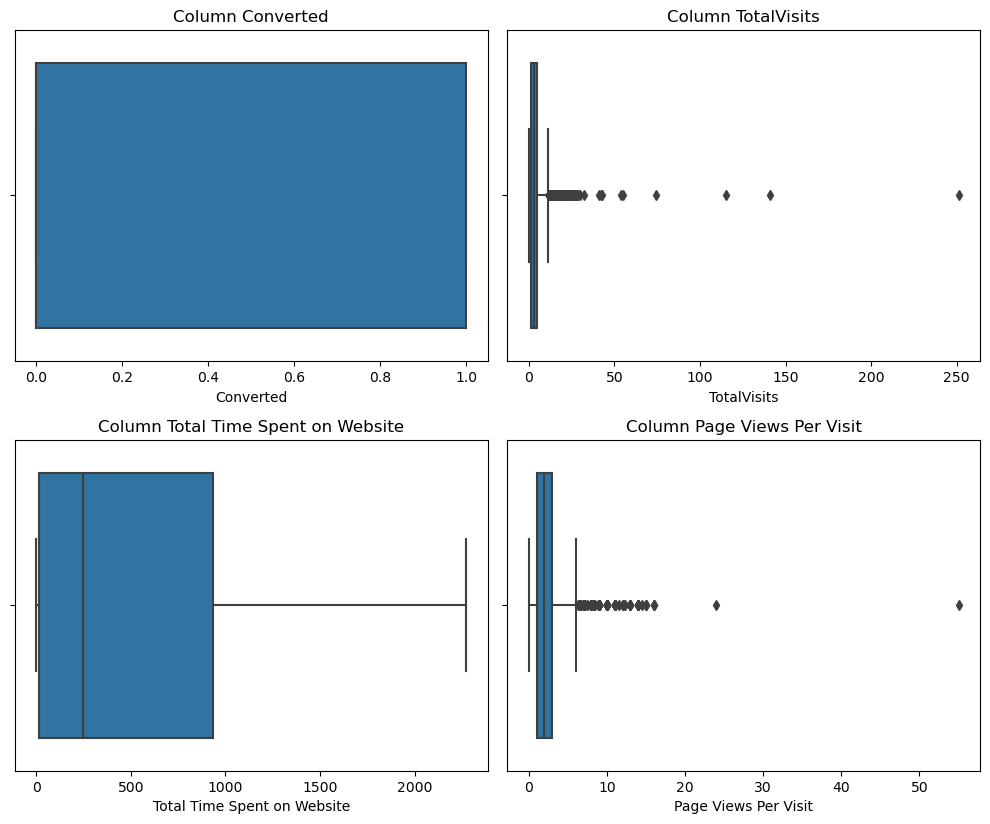

In [17]:
plt.figure(figsize=(10, 20))

for i, column in enumerate(df.columns):
    if df[column].dtypes == 'object':
        continue
    else:
        plt.subplot(5, 2, i + 1)
        sns.boxplot(x=df[column]) 
        plt.title(f'Column {column}')

plt.tight_layout()
plt.show()

In [18]:
df.groupby('Tags')['Tags'].count()

Tags
Already a student                                     465
Busy                                                  186
Closed by Horizzon                                    358
Diploma holder (Not Eligible)                          63
Graduation in progress                                111
In confusion whether part time or DLP                   5
Interested  in full time MBA                          117
Interested in Next batch                                5
Interested in other courses                           513
Lateral student                                         3
Lost to EINS                                          175
Lost to Others                                          7
Not doing further education                           145
Recognition issue (DEC approval)                        1
Ringing                                              1203
Shall take in the next coming month                     2
Still Thinking                                          6
Universit

In [19]:
df.groupby('Lead Profile')['Lead Profile'].count()

Lead Profile
Dual Specialization Student      20
Lateral Student                  24
Other Leads                     487
Potential Lead                 1613
Select                         4146
Student of SomeSchool           241
Name: Lead Profile, dtype: int64

In [20]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()

In [21]:
print(columns_with_nulls)

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City']


In [22]:
columns_to_fill = ['Lead Quality', 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']

for column_name in columns_to_fill:
    # Calculating percentage counts for each sub-category
    percentage_counts = df[column_name].value_counts(normalize=True)

    # Finding null indices in the current column
    null_indices = df[df[column_name].isnull()].index

    # Filling null values based on percentage counts
    df.loc[null_indices, column_name] = np.random.choice(
        percentage_counts.index,
        size=len(null_indices),
        replace=True,
        p=percentage_counts.values
    )

In [23]:
df.groupby('Lead Profile')['Lead Profile'].count()

Lead Profile
Dual Specialization Student      29
Lateral Student                  34
Other Leads                     675
Potential Lead                 2303
Select                         5854
Student of SomeSchool           345
Name: Lead Profile, dtype: int64

In [24]:
df.groupby('Tags')['Tags'].count()

Tags
Already a student                                     744
Busy                                                  288
Closed by Horizzon                                    583
Diploma holder (Not Eligible)                          87
Graduation in progress                                172
In confusion whether part time or DLP                   7
Interested  in full time MBA                          176
Interested in Next batch                                9
Interested in other courses                           799
Lateral student                                         5
Lost to EINS                                          274
Lost to Others                                         10
Not doing further education                           229
Recognition issue (DEC approval)                        1
Ringing                                              1879
Shall take in the next coming month                     2
Still Thinking                                          9
Universit

In [25]:
df.groupby('Lead Profile')['Lead Profile'].count()

Lead Profile
Dual Specialization Student      29
Lateral Student                  34
Other Leads                     675
Potential Lead                 2303
Select                         5854
Student of SomeSchool           345
Name: Lead Profile, dtype: int64

In [26]:
# drop column Lead Profile as there is a select sub type in column which is similar like null value so total count of null for this column is very high.

In [27]:
columns_to_drop = ['Lead Profile']
df.drop(columns=columns_to_drop, inplace=True)

In [28]:
df.groupby('What matters most to you in choosing a course')['What matters most to you in choosing a course'].count()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
df.groupby('How did you hear about X Education')['How did you hear about X Education'].count()

How did you hear about X Education
Advertisements             96
Email                      35
Multiple Sources          201
Online Search            1065
Other                     247
SMS                        29
Select                   6609
Social Media               86
Student of SomeSchool     402
Word Of Mouth             470
Name: How did you hear about X Education, dtype: int64

In [30]:
#drop the above column as select represents irrelevant parameter to select

In [31]:
columns_to_drop = ['How did you hear about X Education']
df.drop(columns=columns_to_drop, inplace=True)

In [32]:
df.groupby('Specialization')['Specialization'].count()

Specialization
Banking, Investment And Insurance     402
Business Administration               495
E-Business                             66
E-COMMERCE                            134
Finance Management                   1145
Healthcare Management                 186
Hospitality Management                135
Human Resource Management            1015
IT Projects Management                432
International Business                208
Marketing Management                  986
Media and Advertising                 245
Operations Management                 594
Retail Management                     122
Rural and Agribusiness                 85
Select                               2300
Services Excellence                    49
Supply Chain Management               409
Travel and Tourism                    232
Name: Specialization, dtype: int64

In [33]:
# as we saw earlier we had 5600 unemployed people so basically they can or cant have any kind of specialization so the select here in specialization can represent that number so we cant consider this as irrelevant.
# we will try to replace this select word with 'no specialization'.

In [34]:
df['Specialization'] = df['Specialization'].replace('Select', 'No Specialization')

In [35]:
df.groupby('Specialization')['Specialization'].count()

Specialization
Banking, Investment And Insurance     402
Business Administration               495
E-Business                             66
E-COMMERCE                            134
Finance Management                   1145
Healthcare Management                 186
Hospitality Management                135
Human Resource Management            1015
IT Projects Management                432
International Business                208
Marketing Management                  986
Media and Advertising                 245
No Specialization                    2300
Operations Management                 594
Retail Management                     122
Rural and Agribusiness                 85
Services Excellence                    49
Supply Chain Management               409
Travel and Tourism                    232
Name: Specialization, dtype: int64

In [36]:
df.groupby('City')['City'].count()

City
Mumbai                         3780
Other Cities                    808
Other Cities of Maharashtra     550
Other Metro Cities              453
Select                         2630
Thane & Outskirts               929
Tier II Cities                   90
Name: City, dtype: int64

In [37]:
df['City'] = df['City'].replace('Select', 'Mumbai')

In [38]:
df.groupby('City')['City'].count()

City
Mumbai                         6410
Other Cities                    808
Other Cities of Maharashtra     550
Other Metro Cities              453
Thane & Outskirts               929
Tier II Cities                   90
Name: City, dtype: int64

In [39]:
columns_to_check = ['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']
df.dropna(subset=columns_to_check, inplace=True)

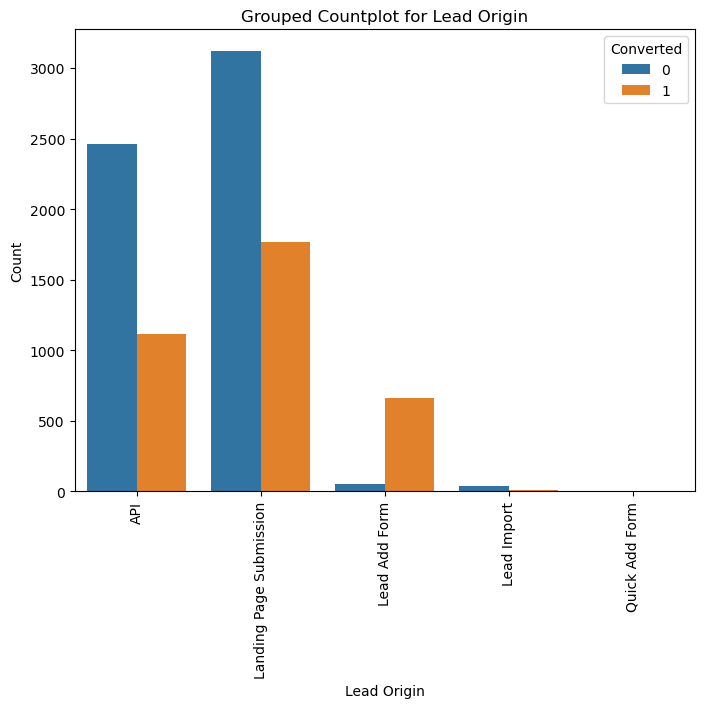

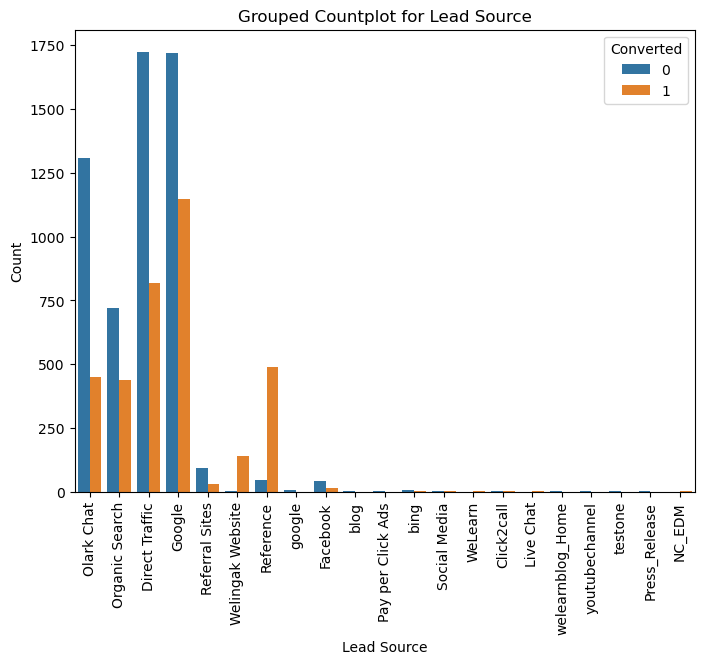

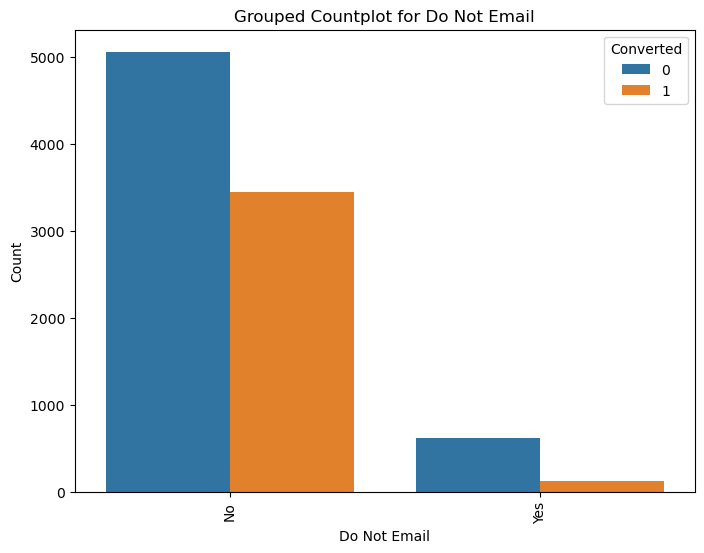

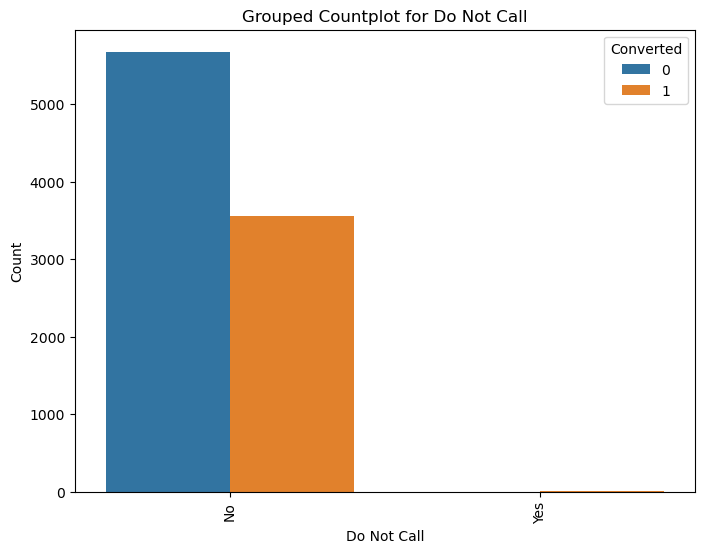

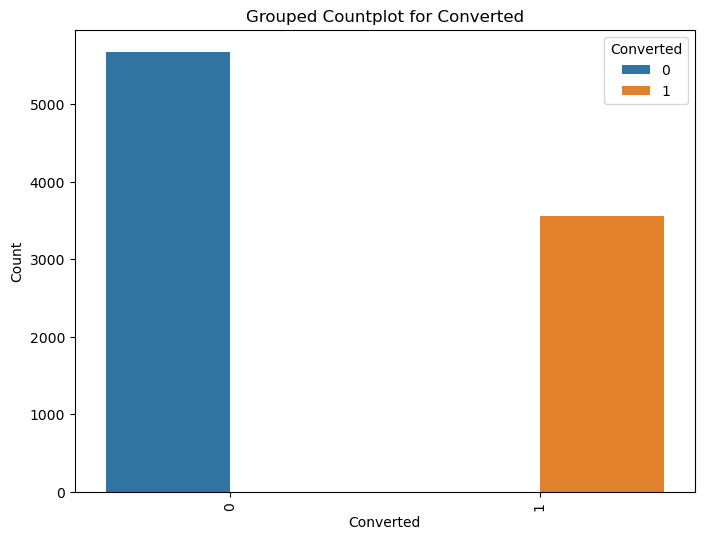

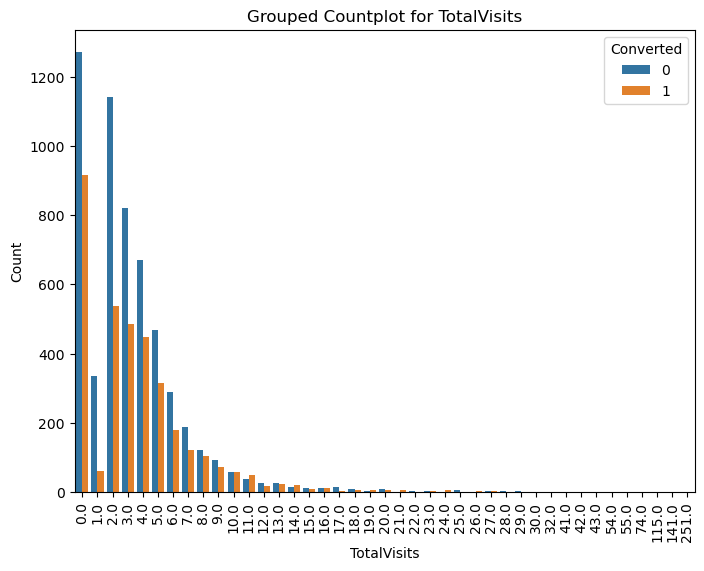

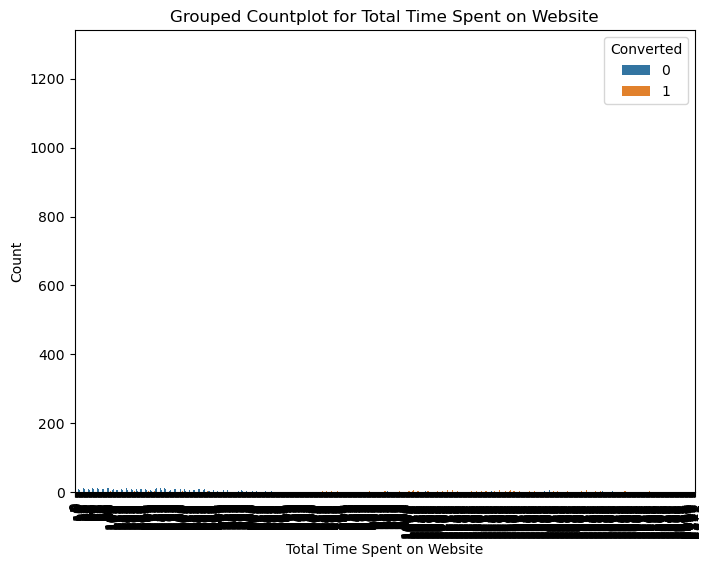

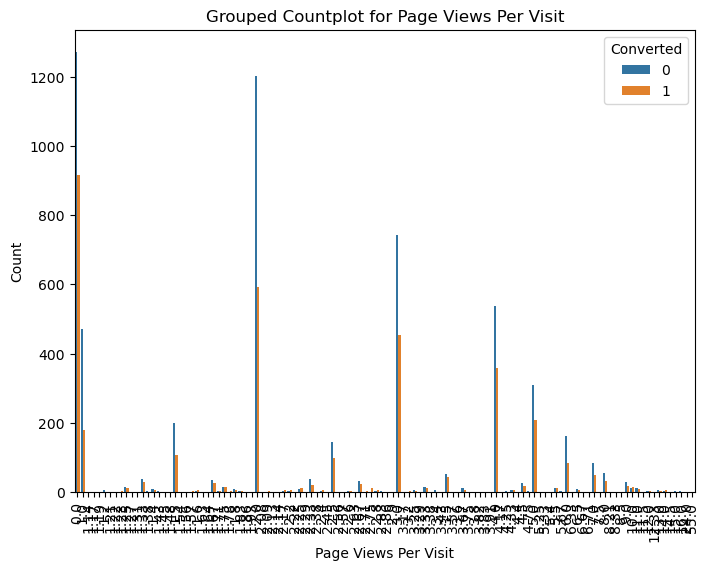

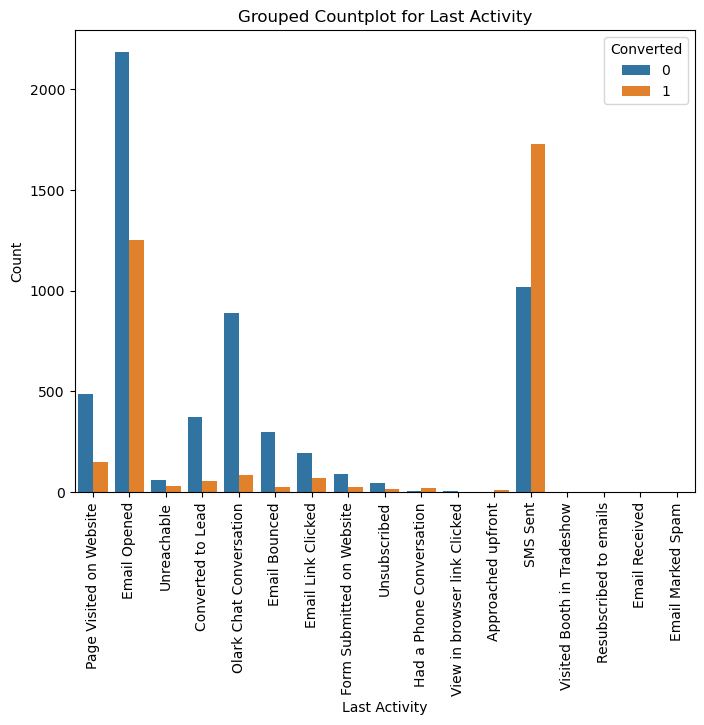

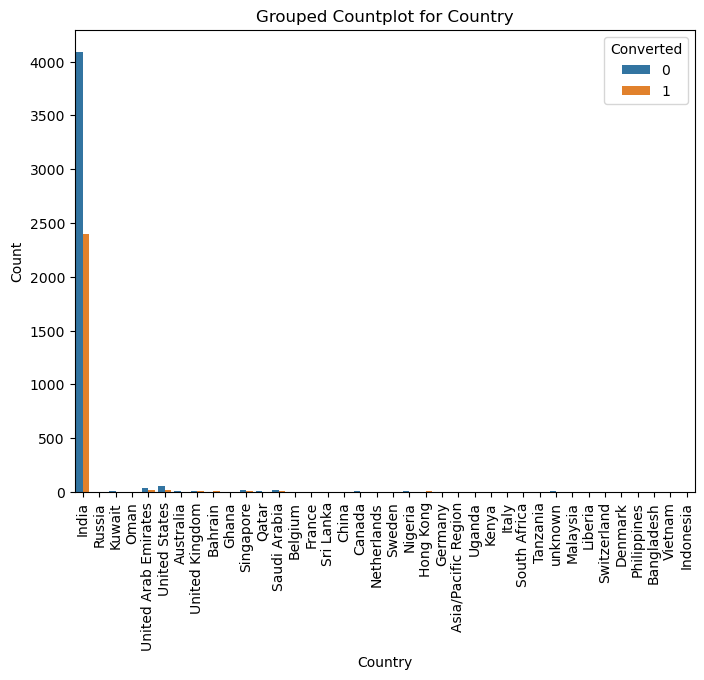

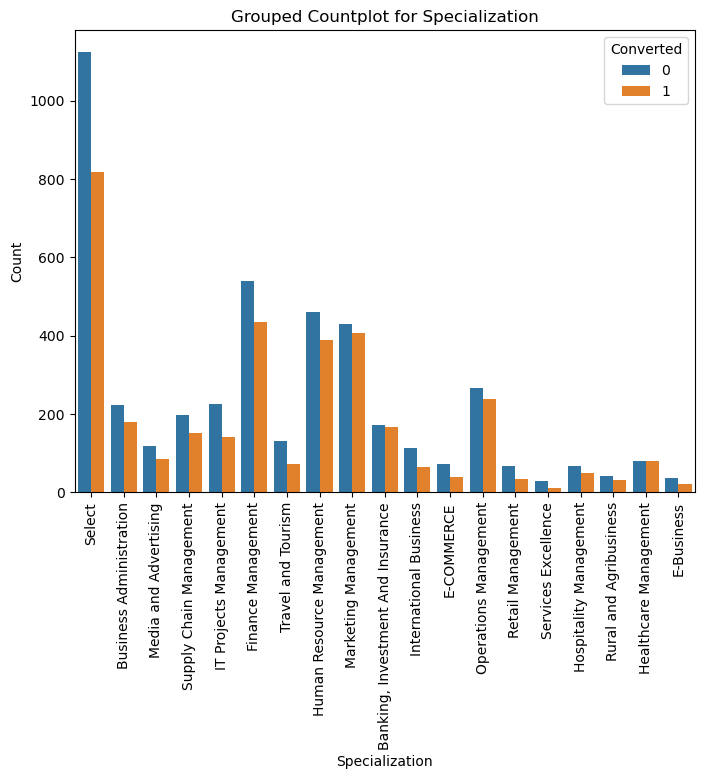

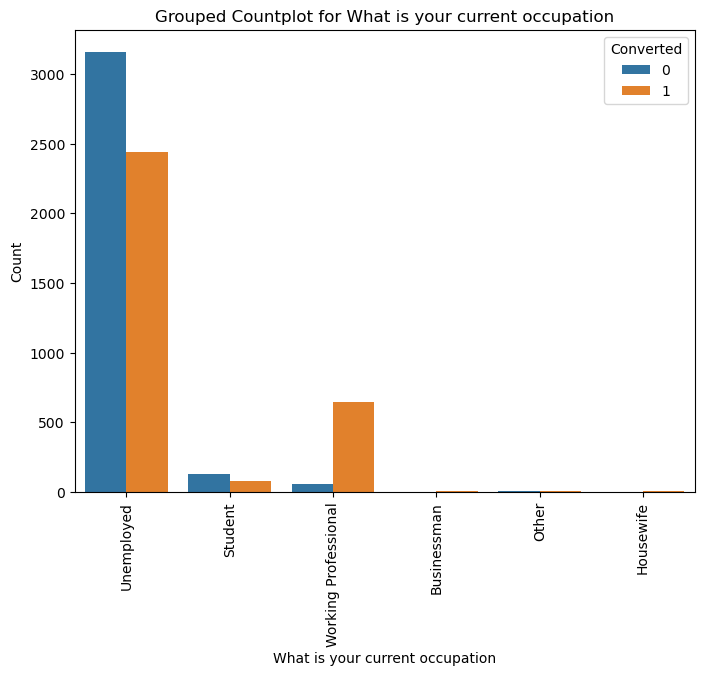

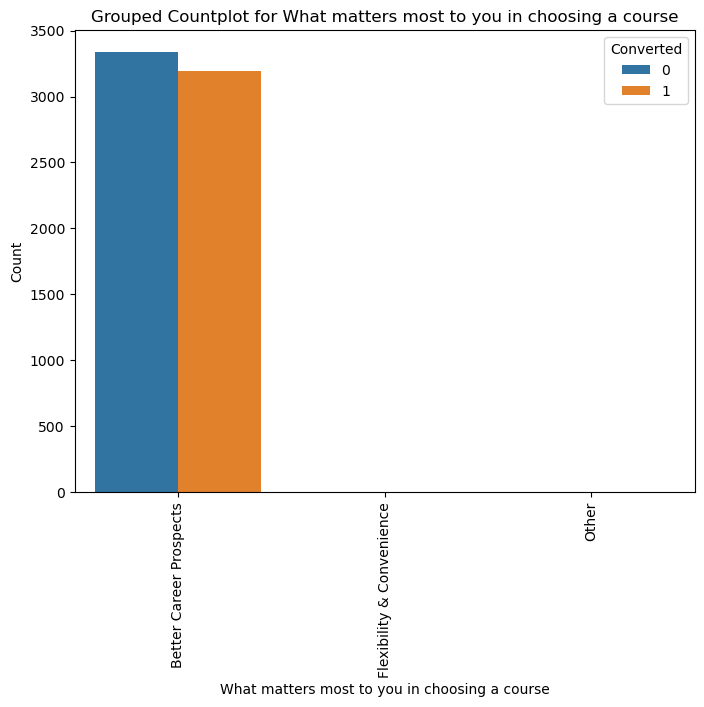

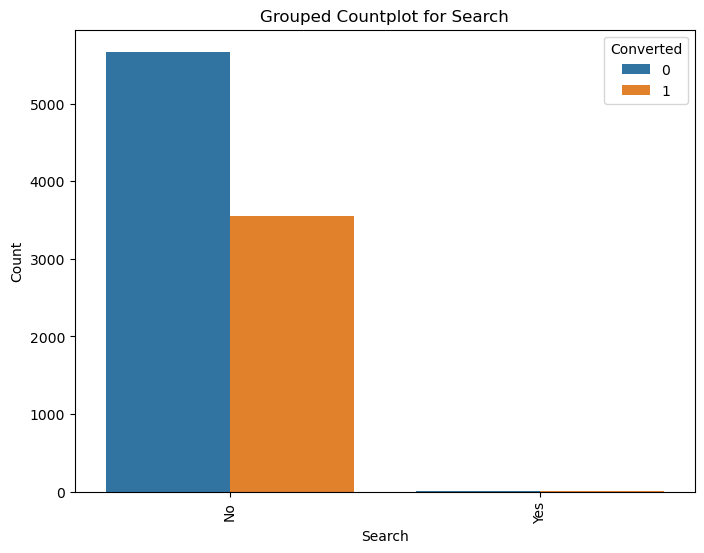

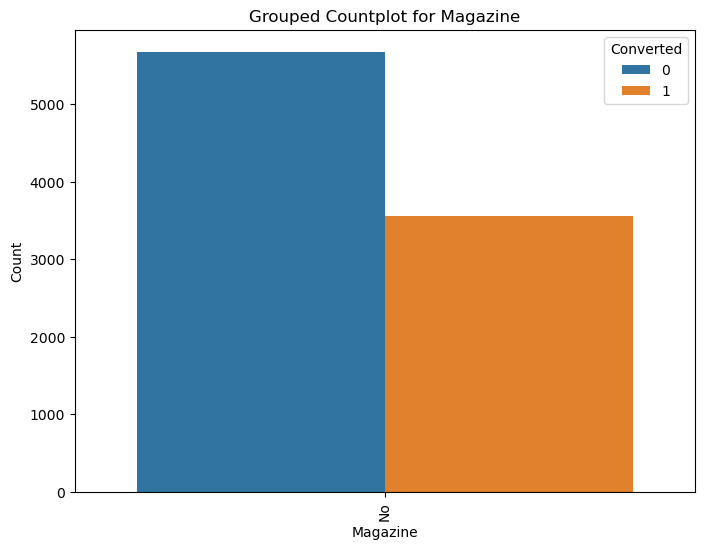

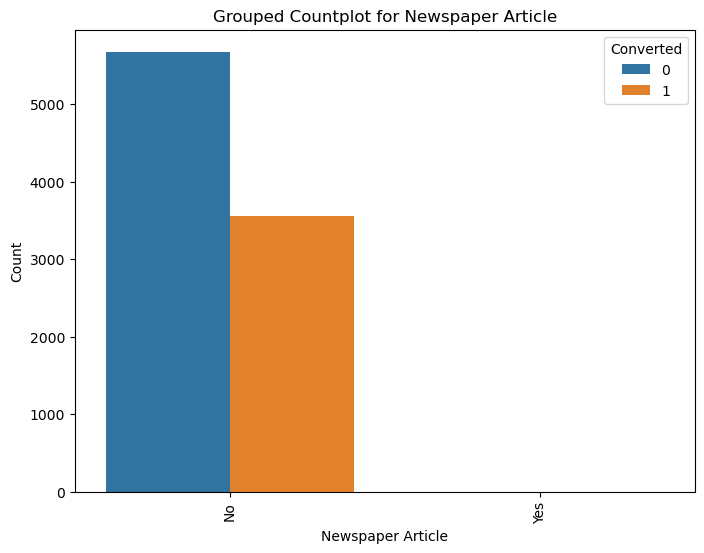

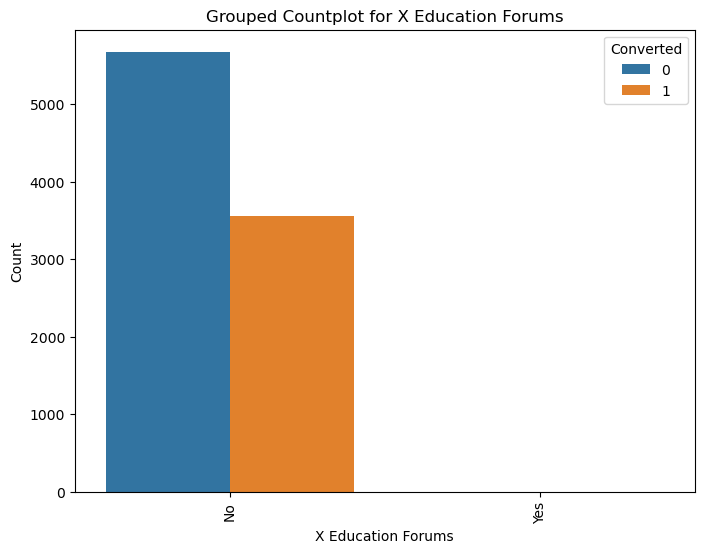

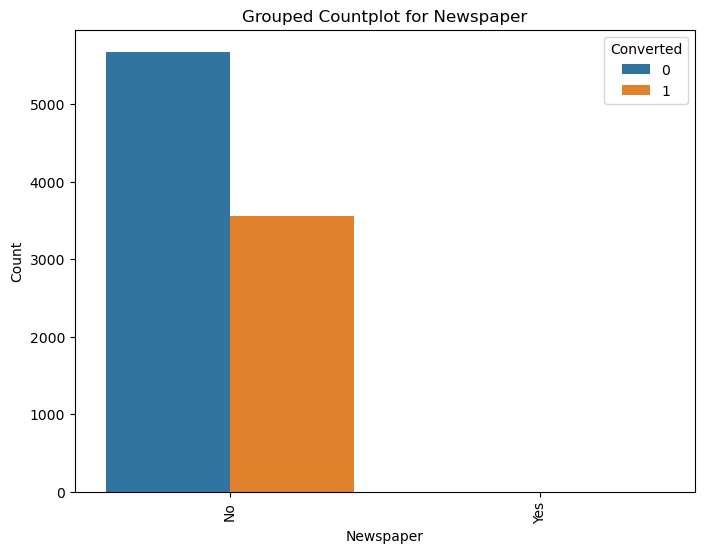

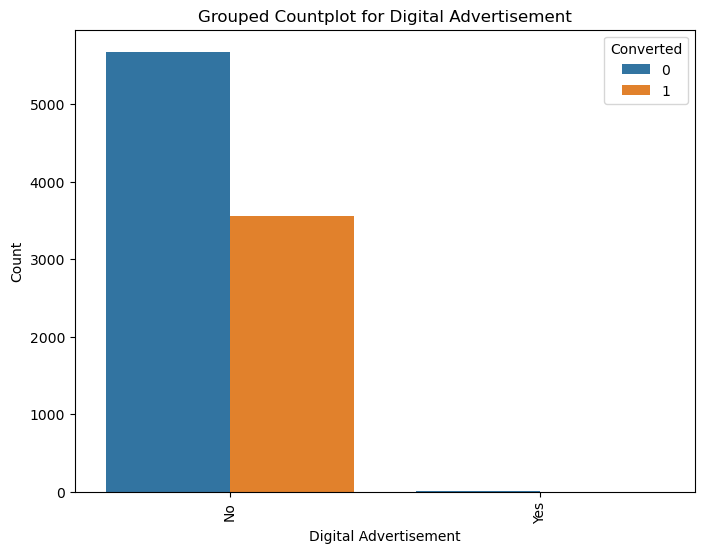

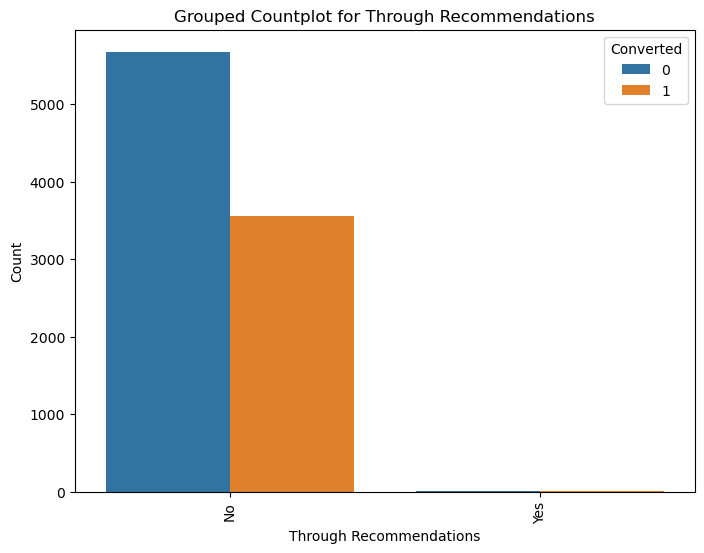

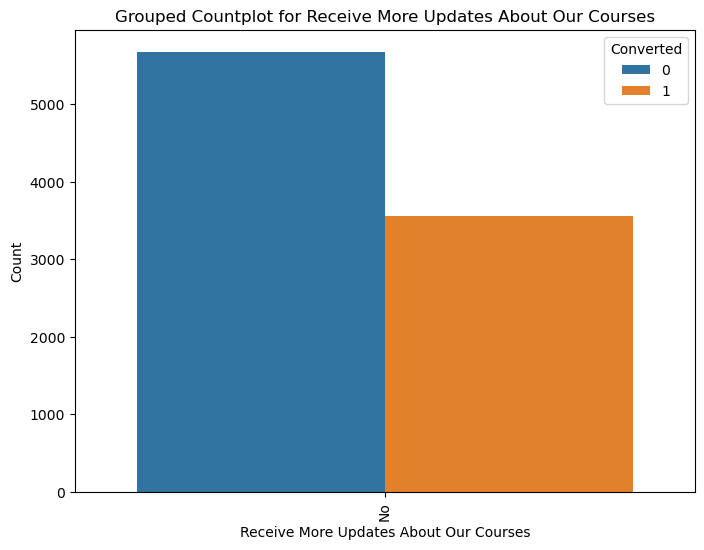

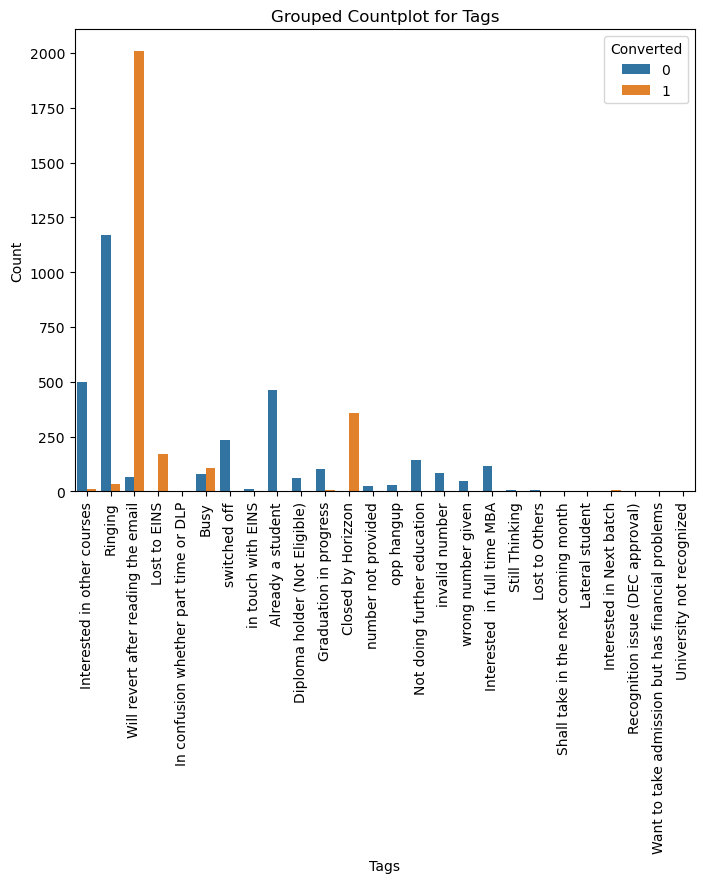

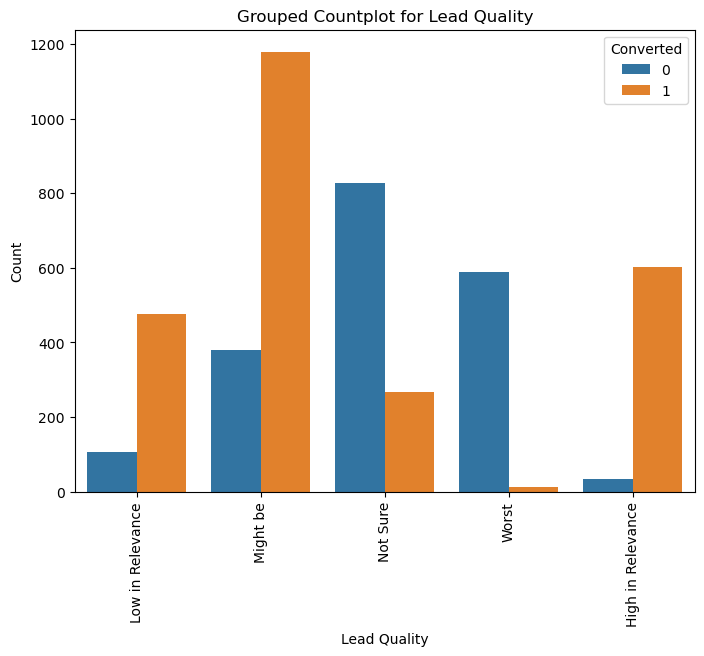

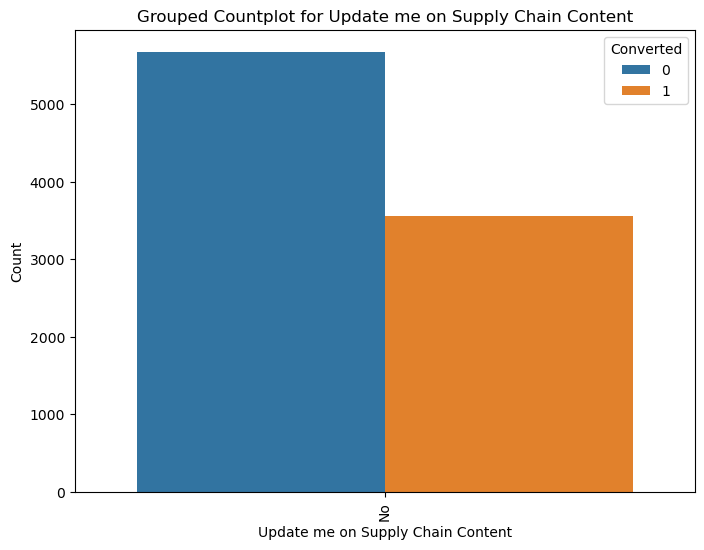

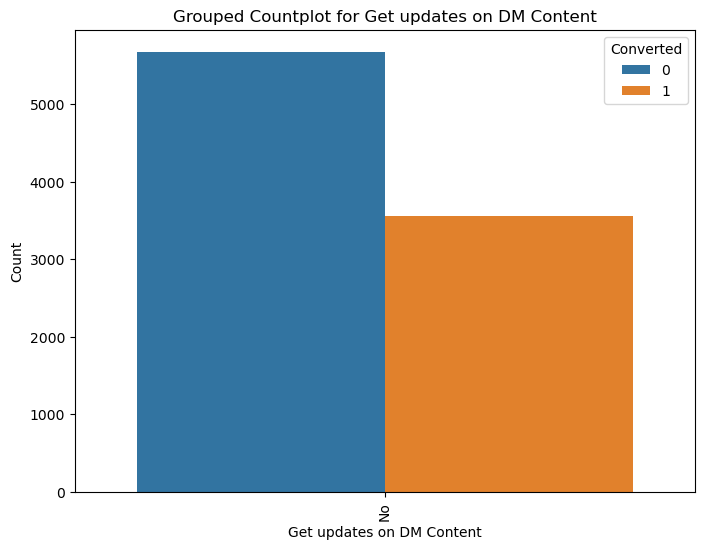

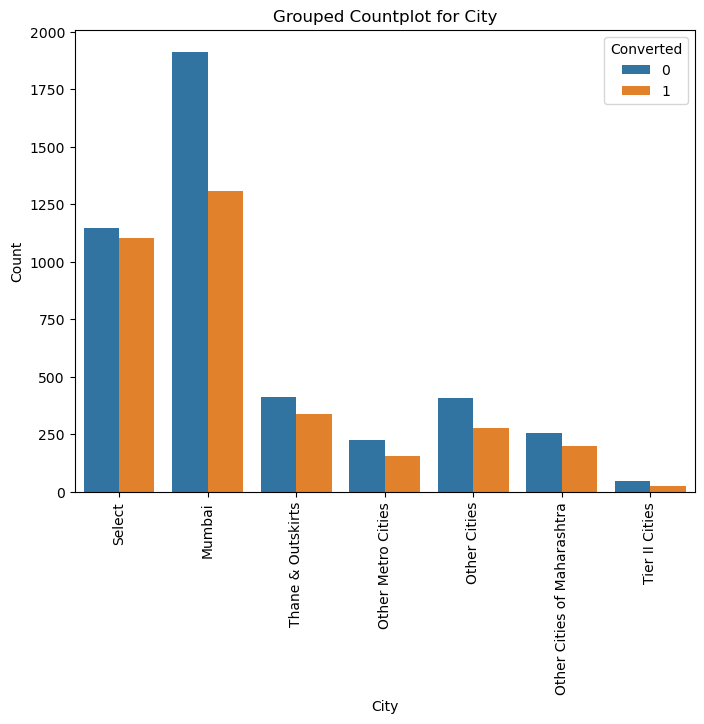

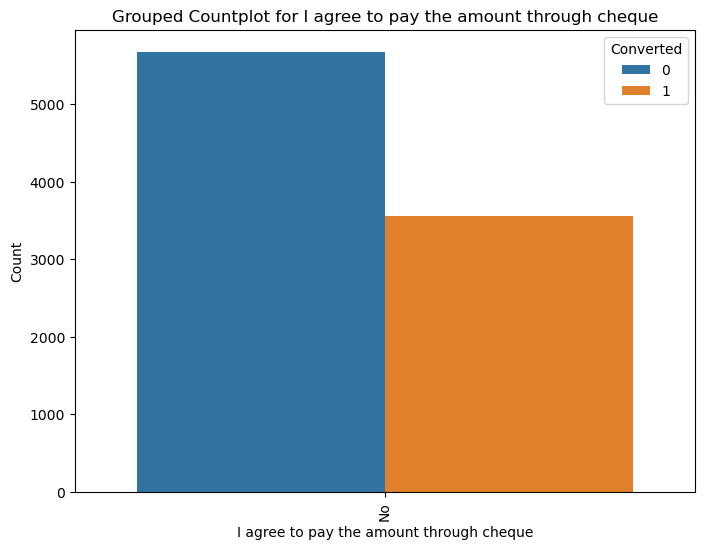

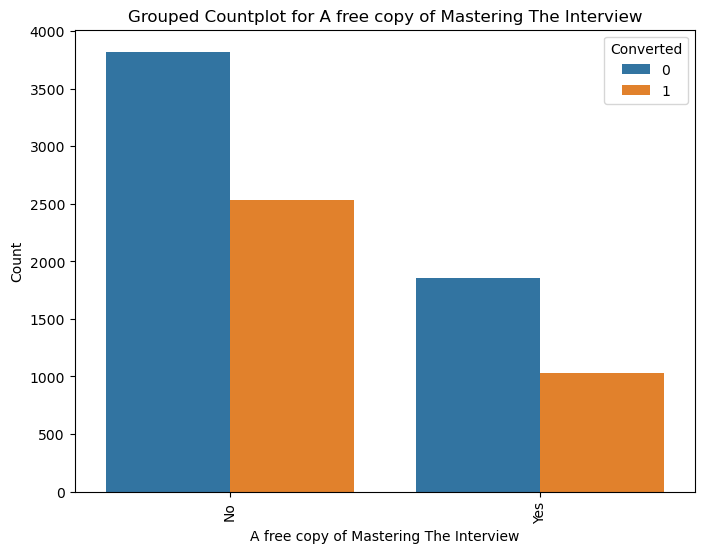

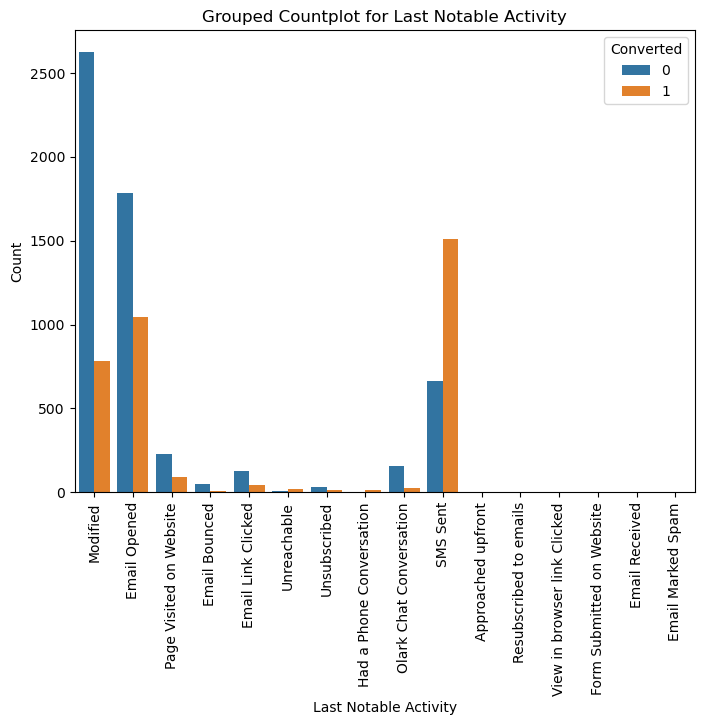

In [40]:
variable_columns = df.columns[0:]
# Looping through each variable and create countplot
for var in variable_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var, hue='Converted')
    plt.title(f'Grouped Countplot for {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.legend(title='Converted')
    plt.show()

In [41]:
df['Lead Origin'].describe()

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

In [42]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Lead Origin'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted                     0        1
Lead Origin                             
API                      68.85%   31.15%
Landing Page Submission  63.81%   36.19%
Lead Add Form             7.52%   92.48%
Lead Import              76.36%   23.64%
Quick Add Form            0.00%  100.00%
All                      61.46%   38.54%


([0, 1, 2, 3, 4],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

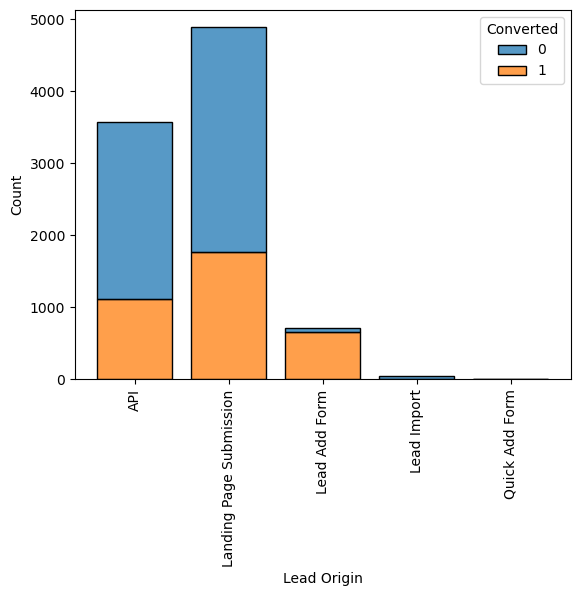

In [43]:
sns.histplot(data=df, x="Lead Origin", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [44]:
df['Lead Source'].describe()

count       9240
unique        21
top       Google
freq        2878
Name: Lead Source, dtype: object

In [45]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Lead Source'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted                0        1
Lead Source                        
Click2call          25.00%   75.00%
Direct Traffic      67.59%   32.41%
Facebook            76.36%   23.64%
Google              59.90%   40.10%
Live Chat            0.00%  100.00%
NC_EDM               0.00%  100.00%
Olark Chat          74.13%   25.87%
Organic Search      62.04%   37.96%
Pay per Click Ads  100.00%    0.00%
Press_Release      100.00%    0.00%
Reference            8.41%   91.59%
Referral Sites      75.20%   24.80%
Social Media        50.00%   50.00%
WeLearn              0.00%  100.00%
Welingak Website     1.41%   98.59%
bing                83.33%   16.67%
blog               100.00%    0.00%
google             100.00%    0.00%
testone            100.00%    0.00%
welearnblog_Home   100.00%    0.00%
youtubechannel     100.00%    0.00%
All                 61.46%   38.54%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

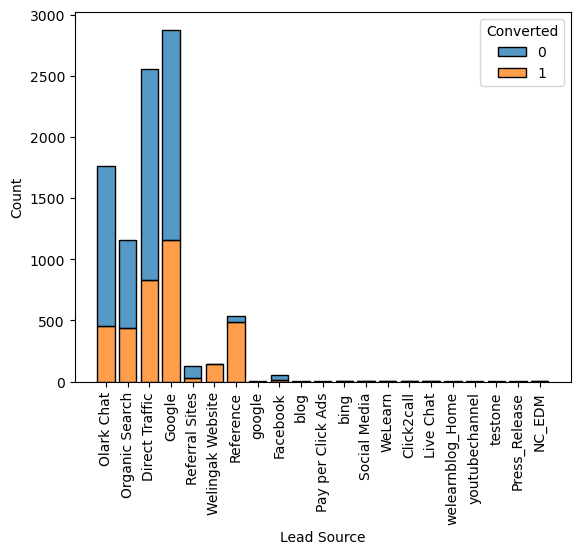

In [46]:
sns.histplot(data=df, x="Lead Source", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [47]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [48]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Do Not Email'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted          0       1
Do Not Email                
No            59.52%  40.48%
Yes           83.92%  16.08%
All           61.46%  38.54%


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

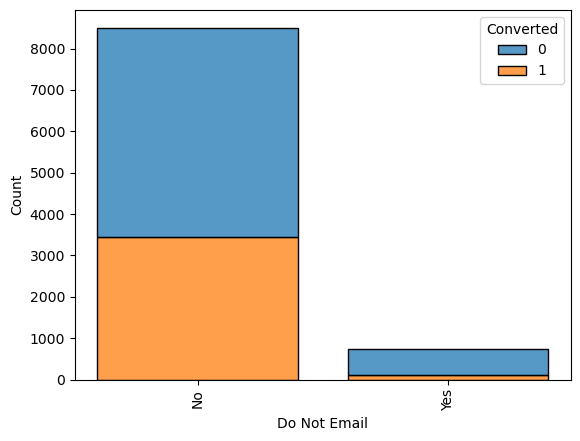

In [49]:
sns.histplot(data=df, x="Do Not Email", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [50]:
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Do Not Call'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted         0        1
Do Not Call                 
No           61.47%   38.53%
Yes           0.00%  100.00%
All          61.46%   38.54%


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

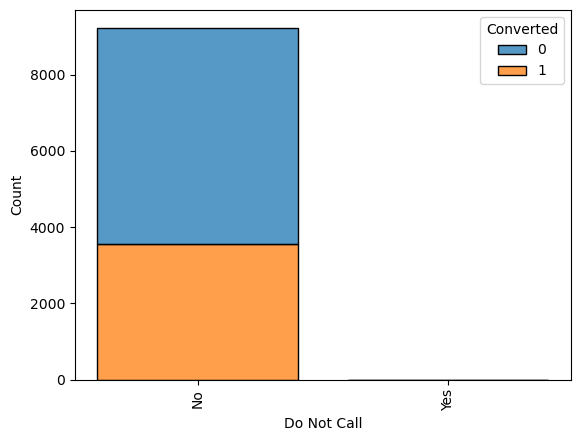

In [52]:
sns.histplot(data=df, x="Do Not Call", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [53]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Last Activity'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted                           0        1
Last Activity                                 
Approached upfront              0.00%  100.00%
Converted to Lead              86.64%   13.36%
Email Bounced                  90.99%    9.01%
Email Link Clicked             71.32%   28.68%
Email Marked Spam               0.00%  100.00%
Email Opened                   63.06%   36.94%
Email Received                  0.00%  100.00%
Form Submitted on Website      74.58%   25.42%
Had a Phone Conversation       26.67%   73.33%
Olark Chat Conversation        90.91%    9.09%
Page Visited on Website        75.65%   24.35%
Resubscribed to emails          0.00%  100.00%
SMS Sent                       36.91%   63.09%
Unreachable                    66.67%   33.33%
Unsubscribed                   73.77%   26.23%
View in browser link Clicked   83.33%   16.67%
Visited Booth in Tradeshow    100.00%    0.00%
All                            61.46%   38.54%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Approached upfront'),
  Text(13, 0, 'Visited Booth in Tradeshow'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

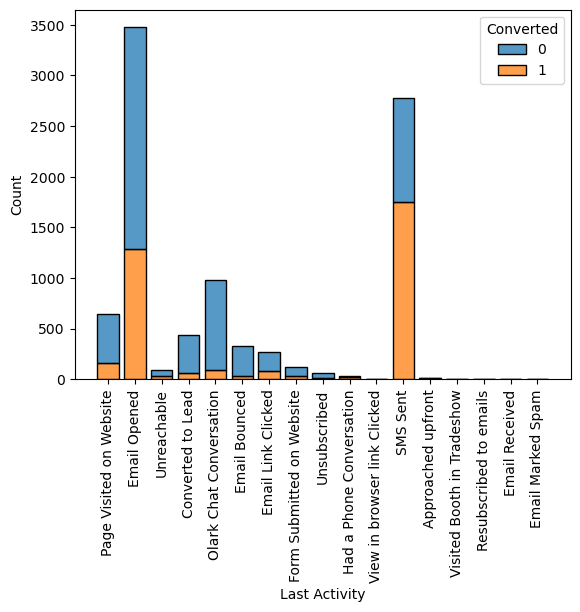

In [54]:
sns.histplot(data=df, x="Last Activity", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [55]:
crosstab_result = pd.crosstab(columns=df['Converted'], index=df['Specialization'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

Converted                               0       1
Specialization                                   
Banking, Investment And Insurance  55.97%  44.03%
Business Administration            61.01%  38.99%
E-Business                         66.67%  33.33%
E-COMMERCE                         67.16%  32.84%
Finance Management                 60.87%  39.13%
Healthcare Management              56.99%  43.01%
Hospitality Management             62.96%  37.04%
Human Resource Management          60.00%  40.00%
IT Projects Management             65.51%  34.49%
International Business             67.31%  32.69%
Marketing Management               56.69%  43.31%
Media and Advertising              64.08%  35.92%
No Specialization                  62.83%  37.17%
Operations Management              58.25%  41.75%
Retail Management                  70.49%  29.51%
Rural and Agribusiness             61.18%  38.82%
Services Excellence                77.55%  22.45%
Supply Chain Management            62.59%  37.41%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'No Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'Banking, Investment And Insurance'),
  Text(5, 0, 'IT Projects Management'),
  Text(6, 0, 'Finance Management'),
  Text(7, 0, 'Travel and Tourism'),
  Text(8, 0, 'Human Resource Management'),
  Text(9, 0, 'Marketing Management'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

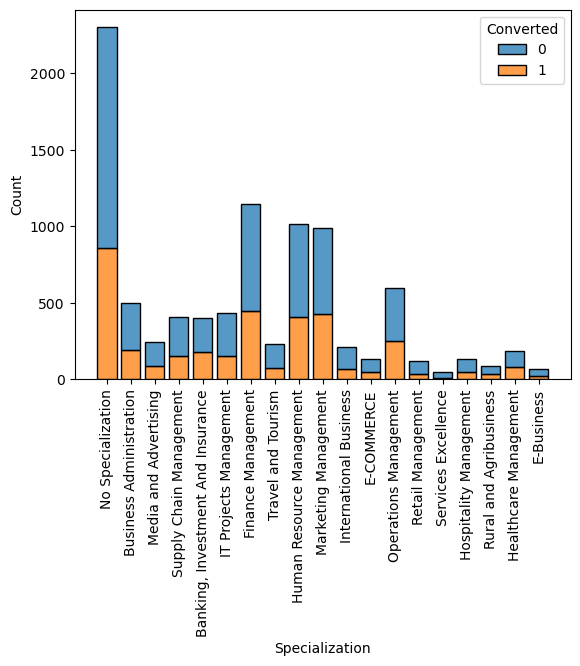

In [56]:
sns.histplot(data=df, x="Specialization", hue="Converted", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [57]:
df = df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [58]:
int1 = []
obj1 = []
flo1 = []

for i in df.columns:
    if df[i].dtypes == 'int64':
        int1.append(i)
    elif df[i].dtypes == 'object':
        obj1.append(i)
    else:
        flo1.append(i)